## 1. Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
data = pd.read_csv('WC_AT.csv')
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


## 2. Initial Investigation

In [4]:
data.shape

(109, 2)

In [5]:
data.isnull().sum()

Waist    0
AT       0
dtype: int64

In [6]:
data.dtypes

Waist    float64
AT       float64
dtype: object

## 3. Assumptions check

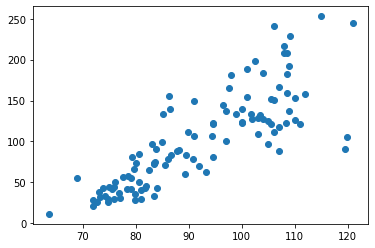

In [7]:
plt.scatter(x = 'Waist', y = 'AT',data=data)
#data of waist seems to be positively correlated with AT

In [8]:
data.corr()
#82% correlation between the data

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


### 4 Linear regression with Statsmodels

In [9]:
#ols - ordinary least sqaures --> Inorder to find the best fit line.
model = smf.ols('AT~Waist',data = data).fit() #Model Training

<AxesSubplot:xlabel='Waist', ylabel='AT'>

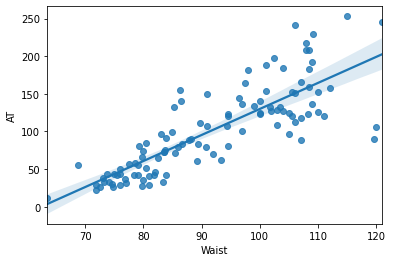

In [10]:
sns.regplot(x='Waist',y='AT',data=data)

In [11]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

## 5. Model Testing

##### Manual calculation

In [12]:
#y = mx + c
#If x = 75, then what is y? ---> 43.432966
#If x = 72, then what is y? ---> 33.056388

##### Machine Prediction

In [18]:
test = pd.DataFrame({'Waist': [75,72,82,51,100,58]})
test

,Waist
0,75
1,72
2,82
3,51
4,100
5,58


In [19]:
model.predict(test)

0     43.432966
1     33.056388
2     67.644982
3    -39.579659
4    129.904451
5    -15.367643
dtype: float64

In [15]:
# for not can't tell model accuracy without MSE